In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [253]:
data = pd.read_csv('/Users/solovyev_na/Desktop/Jupyter/Lifestyle/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv')

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


In [255]:
data.describe()

,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,48.805600,77.359200,171.933200,6.997060,26.84388
std,17.906991,18.714567,15.822225,1.432849,8.25249
min,18.000000,45.000000,145.000000,3.000000,11.40000
25%,34.000000,61.000000,158.000000,6.000000,20.30000
50%,49.000000,77.000000,171.500000,7.000000,26.00000
75%,64.000000,94.000000,186.000000,8.000000,32.40000
max,79.000000,109.000000,199.000000,10.000000,51.40000


In [256]:
data.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


In [257]:
data.columns

Index(['age', 'weight', 'height', 'exercise', 'sleep', 'sugar_intake',
       'smoking', 'alcohol', 'married', 'profession', 'bmi', 'health_risk'],
      dtype='object')

In [258]:
data['health_risk'].nunique()

2

In [259]:
def prep(df):
     exercise_map = {'low': 1, 'medium': 2, 'high': 3, 'none': 0} 
     data['exercise'] = data['exercise'].map(exercise_map)
    
     sugar_map = {'low': 1, 'medium': 2, 'high': 3} 
     data['sugar_intake'] = data['sugar_intake'].map(sugar_map) 

     smoking_map = {'no': 0, 'yes': 1} 
     data['smoking'] = data['smoking'].map(smoking_map) 

     alcohol_map = {'no': 0, 'yes': 1,} 
     data['alcohol'] = data['alcohol'].map(alcohol_map) 
    
     married_map = {'yes': 1, 'no': 0} 
     data['married'] = data['married'].map(married_map) 
    
     profession_map = {'office_worker': 1,'teacher': 2, 'artist': 3, 'farmer': 4, 'driver': 5, 'engineer': 6, 'student': 7, 'doctor': 8} 
     data['profession'] = data['profession'].map(profession_map)

     health_map = {'low': 0, 'high': 1} 
     data['health_risk'] = data['health_risk'].map(health_map)

prep(data)
    

In [260]:
data.head(5)

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,1,6.1,2,1,1,1,1,17.6,1
1,69,76,170,3,6.9,3,0,0,0,2,26.3,1
2,46,106,153,3,6.6,1,1,0,0,3,45.3,1
3,32,54,186,2,8.5,2,0,0,0,3,15.6,0
4,60,98,195,3,8.0,1,0,0,1,2,25.8,1


In [261]:
data.isnull().sum()

age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64

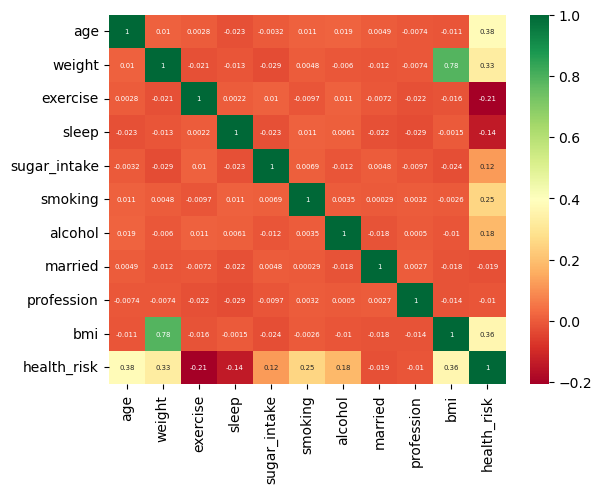

In [262]:
numerical_cols = ['age', 'weight', 'exercise', 'sleep', 'sugar_intake', 'smoking', 'alcohol', 'married', 'profession', 'bmi', 'health_risk']
correlation_matrix = data[numerical_cols].corr()
annot_kws = {"size": 5}
sns.heatmap(correlation_matrix, cmap = 'RdYlGn', annot = True, annot_kws=annot_kws)
plt.show()

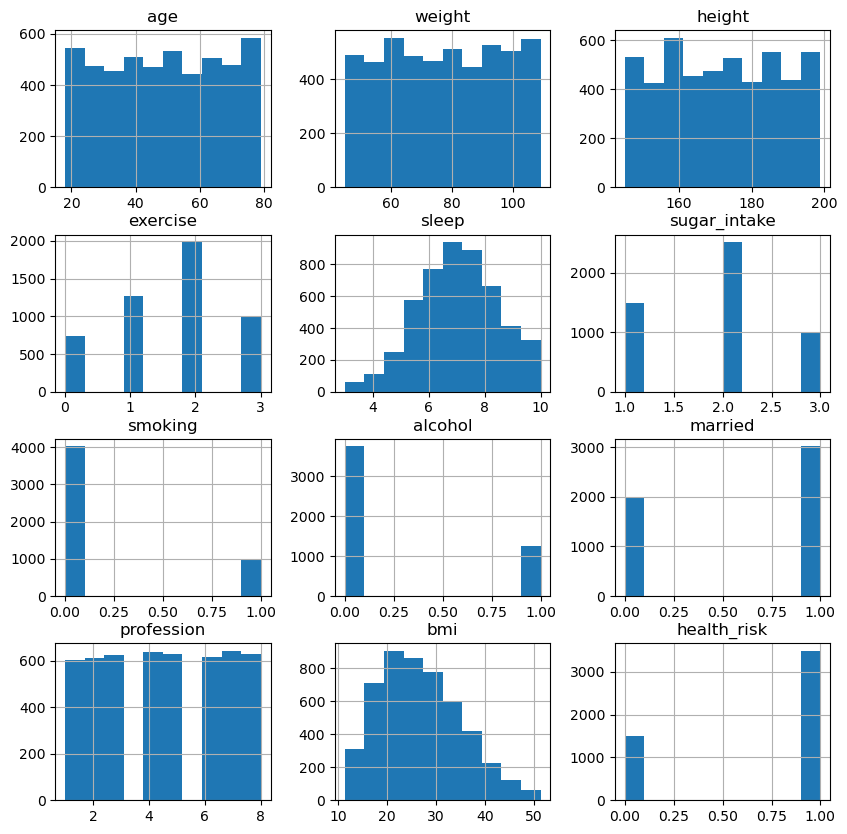

In [263]:
data.hist(bins=10,figsize=(10, 10))
plt.show()

In [264]:
X = data.drop(['health_risk'], axis=1)
y = data['health_risk']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape)

(4000, 11) (1000, 11)


In [266]:
clf_gb = GradientBoostingClassifier()

In [267]:
params = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [1, 10, 100, 300, 500], 'max_depth': [1,2,3,4,5,6,7,8]}

In [268]:
grid_gb = GridSearchCV(estimator=clf_gb, param_grid=params, cv=5)

In [269]:
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [1, 10, 100, 300, 500]})

In [270]:
best_gb = grid_gb.best_estimator_
best_gb

GradientBoostingClassifier(learning_rate=0.001, max_depth=7, n_estimators=500)

In [276]:
clf_gb = GradientBoostingClassifier(learning_rate=0.001, max_depth=7, n_estimators=500)

In [278]:
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=7, n_estimators=500)

In [279]:
y_val_xgb = clf_gb.predict(X_test)

In [280]:
y_val_acc_xgb = accuracy_score(y_test, y_val_xgb)
y_val_acc_xgb

0.996

In [275]:
cv_scores_xgb = cross_val_score(clf_gb, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores_xgb):}")

Cross-Validation Accuracy: 0.9974000000000001


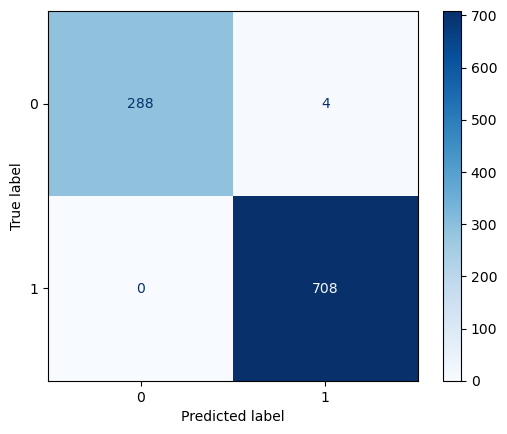

In [282]:
cm = confusion_matrix(y_test, y_val_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()